<h1>Estudo de granularidade</h1>

In [1]:
# filename
filename = 'Datasets\AirQualityUCI\AirQualityUCI.csv'

In [2]:
# bibliotecas
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
# Air Quality

# read
df = pd.read_csv(filename, sep=";")

# get datetime
df['Date'] = pd.to_datetime(df['Date'])

# cols
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

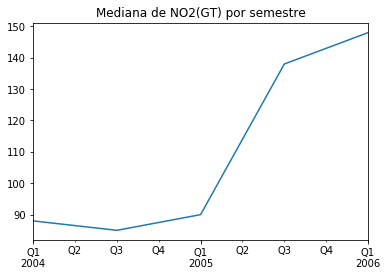

In [4]:
def agg_var_gran_plot(df, agg, var, gran):
    """
    agg: min, max, mode, median, mean
    gran: 1D, 1M, 2M, 3M, 6M, 1Y
    var: col from df
    df: data_frame with a 'Date' col and a var col
    """
    grans = {
        '1D': 'dia', '1M': 'mês', '2M': 'bimestre', '3M': 'trimestre',
        '6M': 'semestre', '1Y': 'ano'
    }
    if agg == 'max':
        df.set_index('Date').resample(gran).max()[var].plot()
        plt.title("Máxima de {} por {}".format(var, grans[gran]))
    elif agg == 'mean':
        df.set_index('Date').resample(gran).mean()[var].plot()
        plt.title("Média de {} por {}".format(var, grans[gran]))
    elif agg == 'min':
        df.set_index('Date').resample(gran).min()[var].plot()
        plt.title("Mínima de {} por {}".format(var, grans[gran]))
    elif agg == 'median':
        df.set_index('Date').resample(gran).median()[var].plot()
        plt.title("Mediana de {} por {}".format(var, grans[gran]))
    plt.xlabel("")
    
agg_var_gran_plot(df, agg='median', var='NO2(GT)', gran='6M')

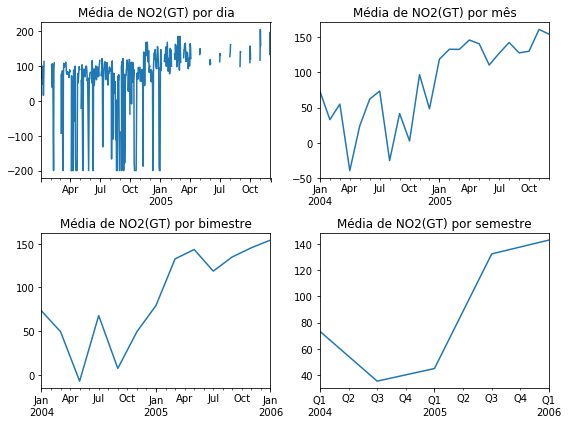

In [6]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
agg_var_gran_plot(df, agg='mean', var='NO2(GT)', gran='1D')

plt.subplot(2,2,2)
agg_var_gran_plot(df, agg='mean', var='NO2(GT)', gran='1M')

plt.subplot(2,2,3)
agg_var_gran_plot(df, agg='mean', var='NO2(GT)', gran='2M')

plt.subplot(2,2,4)
agg_var_gran_plot(df, agg='mean', var='NO2(GT)', gran='6M')

plt.tight_layout()
plt.show()